In [1]:
import numpy as np
from src.GEF import GEF as GEFNew
from src.GEFClassic.GEFClassic import GEF as GEFOld
from Models.Classic import UpdateVals, TimeStep, Initialise
from scipy.integrate import solve_ivp
from src.Tools.timer import Timer
from src.SolverFunctions.WhittakerFuncs import WhittakerApprox
import matplotlib.pyplot as plt

In [2]:
#common parameters
beta = 25
m = 6.16e-6
phi = 15.55
dphi = -np.sqrt(2/3)*m
V = lambda x: 1/2*m**2*x**2
dV = lambda x: m**2*x

ntr = 90
tend = 120
atol = 1e-20
rtol = 1e-6

In [ ]:
GN = GEFNew("Classic", beta, {"phi":phi, "dphi":dphi}, {"V":V, "dV":dV})

solNew = GN.Solver.RunGEF(ntr, tend=tend, printstats=True, reachNend=True, atol=atol, rtol=rtol)

/home/users/rfreiher/Documents/Axion_Inflation/WorkOnGEF/src/GEF.py:170: UserWarning: No default value set for 'kh'
  warnings.warn(f"No default value set for '{key}'")


Removing default event 'End of inflation'
The solver aims at reaching t=120. Attempting run with ntr=90.


/home/users/rfreiher/Documents/Axion_Inflation/WorkOnGEF/src/SolverFunctions/Utility.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x/eps))


Finishing
The run terminated with the following statistics:
nfev : 13454
njev : 0
nlu : 0
status : 0
message : The solver successfully reached the end of the integration interval.
success : True
No events occured during the run


In [4]:
setattr(GN.Solver, "tend", 140)
print(GN.Solver.tend)

140


In [5]:
#Run Old GEF version:
GO = GEFOld(beta, {"phi":phi, "dphi":dphi}, V, dV)
solOld = GO.RunGEF(ntr-1, tend=tend, printstats=True, reachNend=True, atol=atol, rtol=rtol)

The solver aims at reaching t=120
Attempting run with ntr=90


/home/users/rfreiher/Documents/Axion_Inflation/WorkOnGEF/src/GEFClassic/GEFClassic.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x/eps))


The end of inflation was not reached by the solver. Increasing tend by 42.0 to 162.0.
The end of inflation was not reached by the solver. Increasing tend by 113.0 to 275.0.
End of inflation at t=222.8 and N=67.2.
Elapsed time: 94.0185 seconds
To verify a consistent run, checking stability against increasing ntr.
Increasing ntr by 5 to 95.
The solver aims at reaching t=275.0
Attempting run with ntr=95
End of inflation at t=222.8 and N=67.2.
Elapsed time: 95.9804 seconds
The run terminated with the following statistics:
nfev : 17912
njev : 0
nlu : 0
status : 1
message : A termination event occurred.
success : True
The following events occured during the run:
End of inflation at t=[222.8] or N=[67.247]


/home/users/rfreiher/Documents/Axion_Inflation/WorkOnGEF/src/GEFClassic/GEFClassic.py:482: RuntimeWarning: divide by zero encountered in log10
  if np.log10(abs(Ninf-x.Nend)) < Ntol:


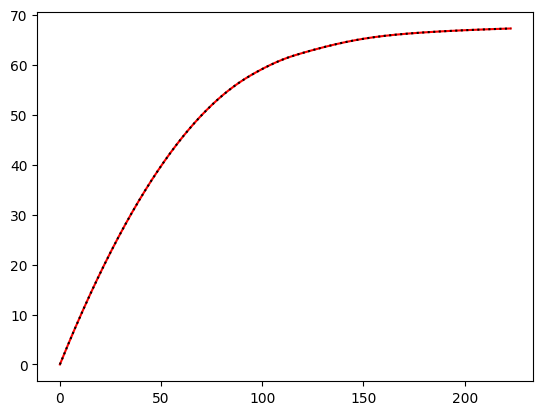

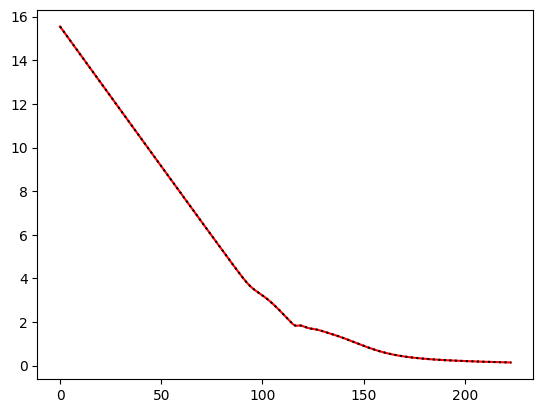

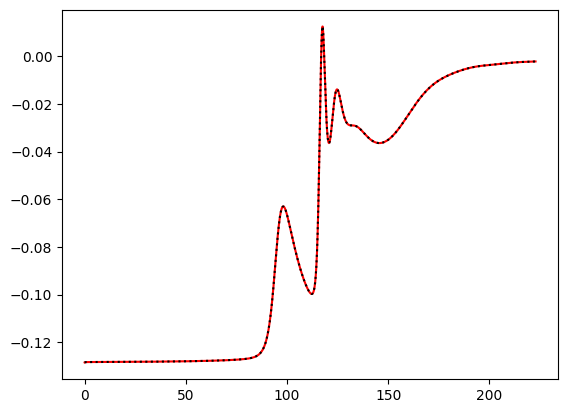

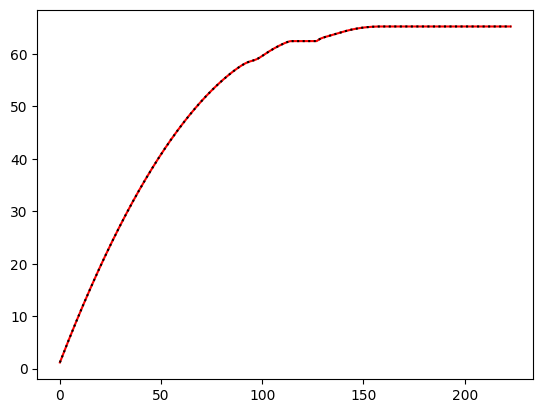

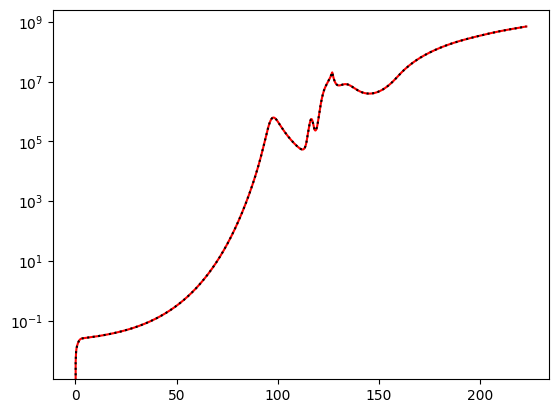

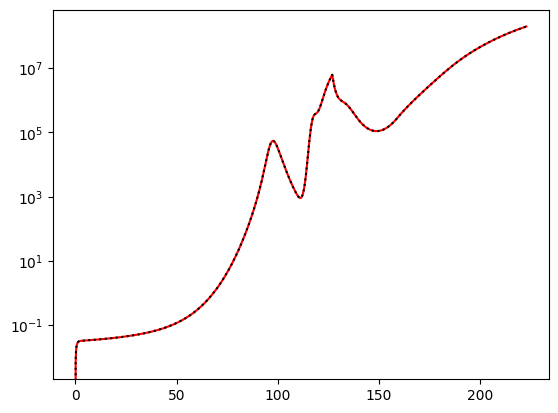

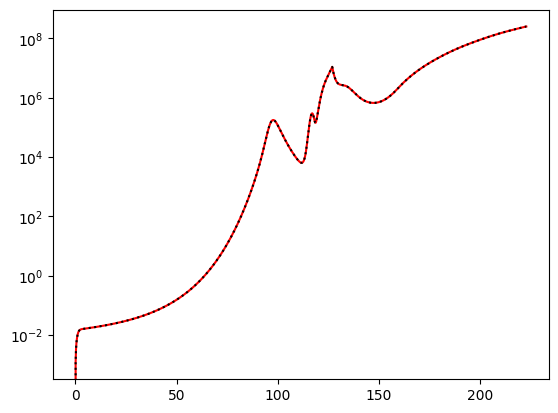

In [7]:
for i in range(4):
    plt.plot(solOld.t, solOld.y[i,:], "r")
    plt.plot(solNew.t, solNew.y[i,:], "k:")
    plt.show()
for i in range(4,7):
    plt.plot(solOld.t, abs(solOld.y[i,:]), "r")
    plt.plot(solNew.t, abs(solNew.y[i,:]), "k:")
    plt.yscale("log")
    plt.show()